## Instructies
- Installeer benodigdheden indien nodig: `networkx`, `matplotlib`.
- Draai de code-cellen onder elkaar in dit notebook.


Joshua Meuleman

Datum 18/11/2025

DFS - algoritme 2

In [21]:
# Imports en helpers
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [22]:
# DFS implementatie die discovery/finish tijden, parent-map en traversal-order teruggeeft.
def dfs_from_start(graph, start):
    visited = set()
    discovery = {}
        
    finish = {}
    parent = {}
    order = []
    time = 0

    def visit(u):
        nonlocal time
        visited.add(u)
        time += 1
        discovery[u] = time
        order.append(u)
        # iterate neighbors in deterministic order for reproducibility
        for v in sorted(graph.neighbors(u), key=lambda x: str(x)):
            if v not in visited:
                parent[v] = u
                visit(v)
        time += 1
        finish[u] = time

    parent[start] = None
    visit(start)
    return {
        'order': order,
        'parent': parent,
        'discovery': discovery,
        'finish': finish
    }

# Algemene DFS die door alle componenten loopt (optioneel)
def full_dfs(graph):
    visited = set()
    discovery = {}
    finish = {}
    parent = {}
    order = []
    time = 0
    def visit(u):
        nonlocal time
        visited.add(u)
        time += 1
        discovery[u] = time
        order.append(u)
        for v in sorted(graph.neighbors(u), key=lambda x: str(x)):
            if v not in visited:
                parent[v] = u
                visit(v)
        time += 1
        finish[u] = time
    for node in sorted(graph.nodes(), key=lambda x: str(x)):
        if node not in visited:
            parent[node] = None
            visit(node)
    return {'order': order,'parent': parent,'discovery': discovery,'finish': finish}

## Graph 1 — Complex Directed Graph (met cycli)
We maken een directed graph met meerdere cycli en cross-links. We starten DFS in `A`.

Traversal order (Graph A): ['S', 'A', 'B', 'C', 'F', 'T1', 'T2', 'D', 'E', 'Y', 'Z', 'X']
Discovery times: {'S': 1, 'A': 2, 'B': 3, 'C': 4, 'F': 5, 'T1': 6, 'T2': 7, 'D': 12, 'E': 13, 'Y': 14, 'Z': 15, 'X': 16}
Finish times: {'T2': 8, 'T1': 9, 'F': 10, 'C': 11, 'X': 17, 'Z': 18, 'Y': 19, 'E': 20, 'D': 21, 'B': 22, 'A': 23, 'S': 24}


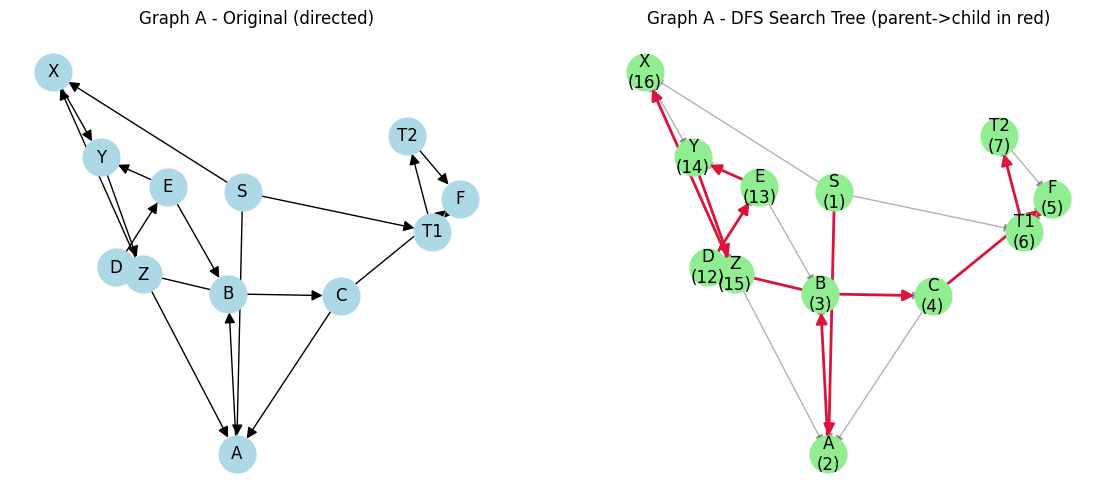

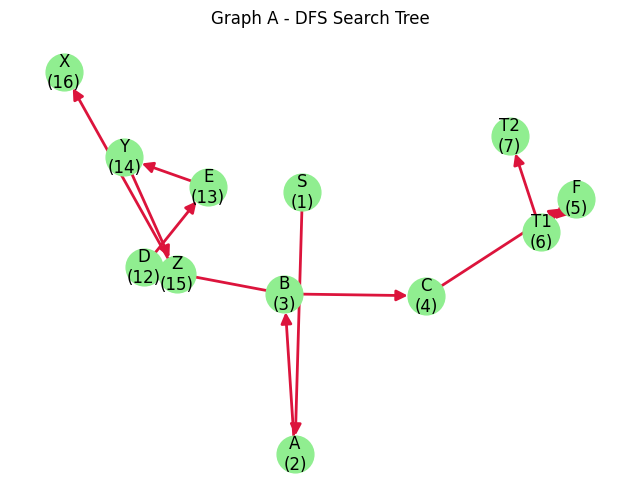

In [23]:
# Constructie Graph A (directed - verschillend van DFS1)
GA = nx.DiGraph()
GA.add_nodes_from(['S','A','B','C','D','E','F','X','Y','Z','T1','T2'])
edgesA = [
    ('S','A'),('S','X'),
    ('A','B'),('B','C'),('C','A'), # SCC A-B-C
    ('B','D'),('D','E'),('E','B'), # SCC B-D-E
    ('X','Y'),('Y','Z'),('Z','X'), # SCC X-Y-Z
    ('C','F'),('F','T1'),('T1','T2'),('T2','F'), # another SCC / back edges
    ('E','Y'),('Z','A'), # cross-links between clusters
    ('S','T1')
 ]
GA.add_edges_from(edgesA)
posA = nx.spring_layout(GA, seed=11)

# Run DFS vanaf 'S'
resA = dfs_from_start(GA, 'S')
print('Traversal order (Graph A):', resA['order'])
print('Discovery times:', resA['discovery'])
print('Finish times:', resA['finish'])

# Maak DFS tree en plot + save tree-only PNG
treeA = nx.DiGraph()
treeA.add_nodes_from(GA.nodes())
for child, par in resA['parent'].items():
    if par is not None:
        treeA.add_edge(par, child)

fig, axes = plt.subplots(1,2, figsize=(14,6))
ax = axes[0]
nx.draw(GA, posA, ax=ax, with_labels=True, node_color='lightblue', arrowsize=16, node_size=700)
ax.set_title('Graph A - Original (directed)')
ax = axes[1]
nx.draw(GA, posA, ax=ax, with_labels=False, node_color='lightgrey', alpha=0.3, arrowsize=12)
nx.draw(treeA, posA, ax=ax, with_labels=False, node_color='lightgreen', edge_color='crimson', arrowsize=16, width=2, node_size=700)
labelsA = {n: f'{n}\n({resA["discovery"].get(n, "")})' for n in treeA.nodes()}
nx.draw_networkx_labels(treeA, posA, labels=labelsA, ax=ax)
ax.set_title('Graph A - DFS Search Tree (parent->child in red)')

# Save tree-only PNG
fig_treeA, ax_treeA = plt.subplots(figsize=(8,6))
ax_treeA.clear()  # ensure a clean axis for the saved tree figure
nx.draw(treeA, posA, ax=ax_treeA, with_labels=False, node_color='lightgreen', edge_color='crimson', arrowsize=16, width=2, node_size=700)
nx.draw_networkx_labels(treeA, posA, labels=labelsA, ax=ax_treeA)
ax_treeA.set_title('Graph A - DFS Search Tree')
fig_treeA.savefig(r'DFS2_graphA_tree.png', dpi=200, bbox_inches='tight')
plt.show()

In [24]:
# Duplicate cell removed (was Graph1 from DFS1)
# This cell was copied accidentally from DFS1 and would generate the same PNG.
# Keeping a placeholder to explain the removal.
pass

## Graph 2 — Complex Undirected Graph (meerdere componenten, cycli en bruggen)
We maken een grotere undirected graph en voeren een volledige DFS uit (bezoekt alle componenten).

Traversal order (Graph B): [1, 2, 3, 4, 8, 11, 10, 18, 19, 20, 9, 5, 6, 12, 13, 14, 15, 16, 17, 7]
Discovery times: {1: 1, 2: 2, 3: 3, 4: 4, 8: 5, 11: 6, 10: 7, 18: 8, 19: 9, 20: 10, 9: 14, 5: 21, 6: 22, 12: 23, 13: 24, 14: 25, 15: 26, 16: 27, 17: 28, 7: 35}
Finish times: {20: 11, 19: 12, 18: 13, 9: 15, 10: 16, 11: 17, 8: 18, 4: 19, 3: 20, 17: 29, 16: 30, 15: 31, 14: 32, 13: 33, 12: 34, 7: 36, 6: 37, 5: 38, 2: 39, 1: 40}


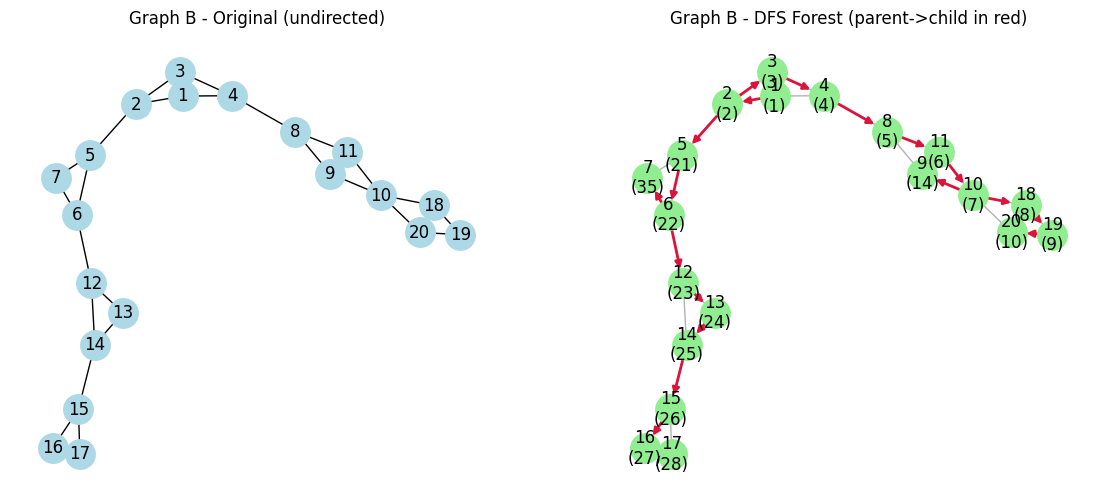

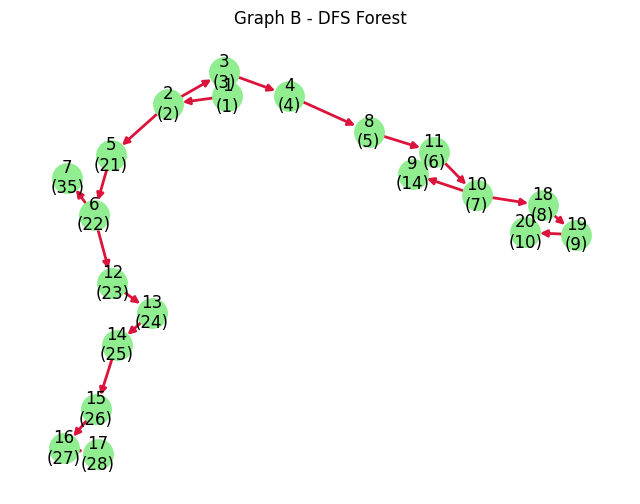

In [25]:
# Constructie Graph B (undirected - verschillend van DFS1)
GB = nx.Graph()
GB.add_nodes_from(range(1,21))
edgesB = [
    (1,2),(2,3),(3,4),(4,1),(2,5),(5,6),(6,7),(7,5), # cluster met twee cycli
    (4,8),(8,9),(9,10),(10,11),(11,8), # cyclus en brug vanaf 4
    (6,12),(12,13),(13,14),(14,12),(14,15), # tak en cyclus
    (15,16),(16,17),(17,15), # kleine cyclus
    (10,18),(18,19),(19,20),(20,10) # externe cyclus verbonden via 10
]
GB.add_edges_from(edgesB)
posB = nx.spring_layout(GB, seed=7)

# Full DFS (alle componenten)
resB = full_dfs(GB)
print('Traversal order (Graph B):', resB['order'])
print('Discovery times:', resB['discovery'])
print('Finish times:', resB['finish'])

# Maak DFS forest uit parent-map
forestB = nx.DiGraph()
forestB.add_nodes_from(GB.nodes())
for child, par in resB['parent'].items():
    if par is not None:
        forestB.add_edge(par, child)

fig, axes = plt.subplots(1,2, figsize=(14,6))
ax = axes[0]
nx.draw(GB, posB, ax=ax, with_labels=True, node_color='lightblue', node_size=450)
ax.set_title('Graph B - Original (undirected)')
ax = axes[1]
nx.draw(GB, posB, ax=ax, with_labels=False, node_color='lightgrey', alpha=0.3)
nx.draw(forestB, posB, ax=ax, with_labels=False, node_color='lightgreen', edge_color='crimson', arrows=True, width=2, node_size=450)
labelsB = {n: f'{n}\n({resB["discovery"].get(n, "")})' for n in forestB.nodes()}
nx.draw_networkx_labels(forestB, posB, labels=labelsB, ax=ax)
ax.set_title('Graph B - DFS Forest (parent->child in red)')

# Save tree-only PNG
fig_treeB, ax_treeB = plt.subplots(figsize=(8,6))
ax_treeB.clear()  # ensure clean axis before drawing the saved tree figure
nx.draw(forestB, posB, ax=ax_treeB, with_labels=False, node_color='lightgreen', edge_color='crimson', arrows=True, width=2, node_size=450)
nx.draw_networkx_labels(forestB, posB, labels=labelsB, ax=ax_treeB)
ax_treeB.set_title('Graph B - DFS Forest')
fig_treeB.savefig(r'DFS2_graphB_forest.png', dpi=200, bbox_inches='tight')

plt.show()

## Conclusie en verificatie
- De `order`, `parent`, `discovery` en `finish` structuren worden afgedrukt en gebruikt om de search trees op te bouwen.
- In de plots zijn de DFS-tree-edges rood gekleurd en tonen ze de boomstructuur die voortkomt uit de DFS doorzoeking.
- Voor Graph 1 is DFS vanaf `A` getoond; voor Graph 2 is een volledige DFS (alle componenten) getoond.
